In \[2\]:

    import pandas as pd
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras import layers,models,datasets

In \[3\]:

    (xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In \[4\]:

    xtrain.shape

Out\[4\]:

    (50000, 32, 32, 3)

In \[5\]:

    ytrain.shape

Out\[5\]:

    (50000, 1)

In \[6\]:

    xtest.shape

Out\[6\]:

    (10000, 32, 32, 3)

In \[7\]:

    ytest.shape

Out\[7\]:

    (10000, 1)

In \[9\]:

    ytrain[:5]

Out\[9\]:

    array([[6],
           [9],
           [9],
           [4],
           [1]], dtype=uint8)

In \[10\]:

    ytrain=ytrain.reshape(-1,)

In \[11\]:

    ytrain[:5]

Out\[11\]:

    array([6, 9, 9, 4, 1], dtype=uint8)

In \[12\]:

    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In \[21\]:

    import matplotlib.pyplot as plt
    def plot_sample(x,y,index):
        plt.figure(figsize=(15,2))
        plt.imshow(x[index])
        plt.xlabel(classes[y[index]])

In \[22\]:

    plot_sample(xtrain,ytrain,9)

<img src="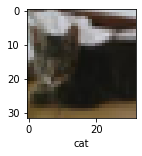%0A" class="jp-needs-light-background" />

In \[23\]:

    xtrain=xtrain/255.0
    xtest=xtest/255.0

In \[27\]:

     

Out\[27\]:

    <matplotlib.image.AxesImage at 0x7fc9746efca0>

<img src="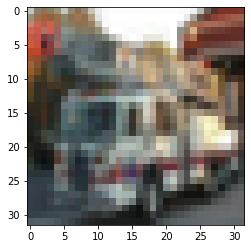%0A" class="jp-needs-light-background" />

In \[39\]:

    ann = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='softmax')    
        ])

    ann.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    ann.fit(xtrain, ytrain, epochs=5)

    Epoch 1/5
    1563/1563 [==============================] - 44s 28ms/step - loss: 1.8100 - accuracy: 0.3545
    Epoch 2/5
    1563/1563 [==============================] - 44s 28ms/step - loss: 1.6247 - accuracy: 0.4274
    Epoch 3/5
    1563/1563 [==============================] - 48s 31ms/step - loss: 1.5415 - accuracy: 0.4584
    Epoch 4/5
    1563/1563 [==============================] - 47s 30ms/step - loss: 1.4788 - accuracy: 0.4830
    Epoch 5/5
    1563/1563 [==============================] - 44s 28ms/step - loss: 1.4316 - accuracy: 0.4988

Out\[39\]:

    <keras.callbacks.History at 0x7fc979f41210>

In \[40\]:

    from sklearn.metrics import confusion_matrix,classification_report

In \[42\]:

    ypred=ann.predict(xtest)

    313/313 [==============================] - 2s 8ms/step

In \[44\]:

    ypre=[np.argmax(i) for i in ypred]

In \[66\]:

    ypre[:5]

Out\[66\]:

    [3, 9, 8, 0, 4]

In \[46\]:

    print(classification_report(ypre,ytest))

                  precision    recall  f1-score   support

               0       0.61      0.50      0.55      1212
               1       0.70      0.52      0.60      1353
               2       0.28      0.43      0.34       665
               3       0.34      0.33      0.34      1015
               4       0.35      0.49      0.41       705
               5       0.43      0.39      0.40      1109
               6       0.57      0.50      0.54      1130
               7       0.47      0.60      0.53       789
               8       0.54      0.67      0.60       812
               9       0.58      0.48      0.52      1210

        accuracy                           0.49     10000
       macro avg       0.49      0.49      0.48     10000
    weighted avg       0.51      0.49      0.49     10000

In \[50\]:

    cnn=models.Sequential([
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
    ])

In \[52\]:

    cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
    cnn.fit(xtrain,ytrain,epochs=5)

    Epoch 1/5
    1563/1563 [==============================] - 17s 11ms/step - loss: 1.5252 - accuracy: 0.4501
    Epoch 2/5
    1563/1563 [==============================] - 17s 11ms/step - loss: 1.1919 - accuracy: 0.5826
    Epoch 3/5
    1563/1563 [==============================] - 21s 13ms/step - loss: 1.0673 - accuracy: 0.6291
    Epoch 4/5
    1563/1563 [==============================] - 23s 15ms/step - loss: 0.9902 - accuracy: 0.6553
    Epoch 5/5
    1563/1563 [==============================] - 26s 17ms/step - loss: 0.9293 - accuracy: 0.6776

Out\[52\]:

    <keras.callbacks.History at 0x7fc9182a60e0>

In \[55\]:

    # print(classification_report())
    p=cnn.predict(xtest)
    p[:5]

    313/313 [==============================] - 1s 3ms/step

Out\[55\]:

    array([[5.3970348e-03, 9.8862359e-04, 5.4804371e-03, 6.5321320e-01,
            6.5574949e-03, 3.0160952e-01, 8.2580494e-03, 1.8614674e-03,
            1.6066154e-02, 5.6807243e-04],
           [9.3404256e-02, 7.0429933e-01, 2.3145018e-05, 7.0160429e-05,
            2.3988572e-05, 5.9953245e-06, 4.6835751e-07, 1.9453884e-05,
            1.5243980e-01, 4.9713422e-02],
           [1.3581060e-01, 4.9447042e-01, 2.3748379e-03, 5.7957773e-03,
            1.9362409e-03, 1.5993958e-03, 2.5087557e-04, 4.1421913e-03,
            2.9256296e-01, 6.1056718e-02],
           [7.6466829e-01, 4.2669829e-02, 3.5191633e-02, 5.3425739e-03,
            1.3227146e-02, 9.1530808e-04, 4.2419424e-03, 3.9713997e-03,
            1.2566318e-01, 4.1085901e-03],
           [6.2829109e-05, 1.1664329e-03, 2.4283035e-02, 1.0539665e-01,
            4.1005516e-01, 4.9020600e-02, 4.0762794e-01, 1.7805538e-03,
            5.5243605e-04, 5.4369815e-05]], dtype=float32)

In \[56\]:

    pre=[np.argmax(i) for i in p ]

In \[57\]:

    pre[:5]

Out\[57\]:

    [3, 1, 1, 0, 4]

In \[59\]:

    print(classification_report(ytest,pre))

                  precision    recall  f1-score   support

               0       0.66      0.76      0.71      1000
               1       0.70      0.84      0.76      1000
               2       0.65      0.43      0.51      1000
               3       0.55      0.38      0.45      1000
               4       0.57      0.65      0.61      1000
               5       0.51      0.66      0.58      1000
               6       0.74      0.76      0.75      1000
               7       0.67      0.78      0.72      1000
               8       0.85      0.65      0.74      1000
               9       0.78      0.71      0.75      1000

        accuracy                           0.66     10000
       macro avg       0.67      0.66      0.66     10000
    weighted avg       0.67      0.66      0.66     10000

In \[ \]:

     

In \[ \]: